# 2

Enter the path of the text file of the image: /content/drive/MyDrive/Computational Neuroscience/ball.txt






  0%|          | 0/8 [00:00<?, ?it/s]

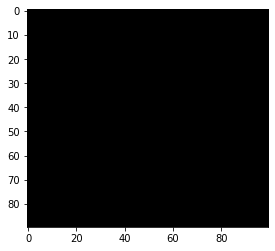





 12%|█▎        | 1/8 [00:45<05:15, 45.03s/it]

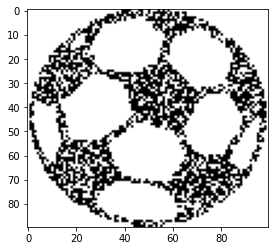





 25%|██▌       | 2/8 [01:33<04:36, 46.04s/it]

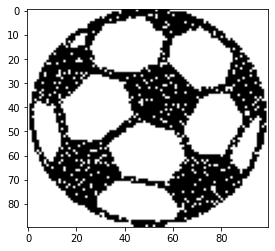





 38%|███▊      | 3/8 [02:20<03:51, 46.20s/it]

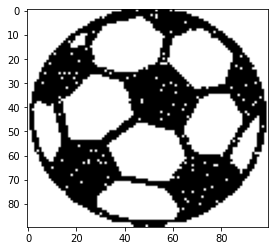





 50%|█████     | 4/8 [03:09<03:08, 47.06s/it]

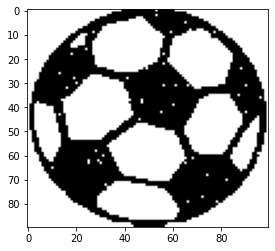





 62%|██████▎   | 5/8 [03:54<02:19, 46.66s/it]

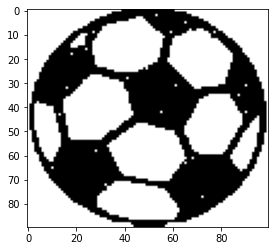





 75%|███████▌  | 6/8 [04:44<01:35, 47.59s/it]

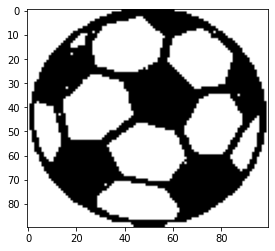





 88%|████████▊ | 7/8 [05:33<00:48, 48.09s/it]

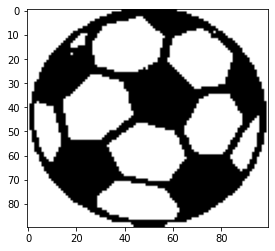





100%|██████████| 8/8 [06:20<00:00, 47.54s/it]


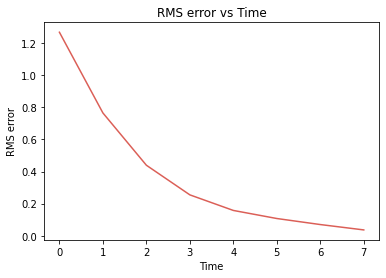

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.metrics import mean_squared_error

def convert_txt_to_array(path, arr):
	'''
	path - path of the text file
	arr - matrix with appropriate shape as that of the text file

	returns a numpy array with the given pixel values in the text file
	'''
	file = open(path, "r")
	z = 0
	for line in file:
		arr[z, :] = np.array(line.split(',')).astype('float')
		z += 1

	return arr

def calc_weight(epsilon):
	W = np.outer(epsilon, epsilon)
	np.fill_diagonal(W, 0)
	W = W / W.shape[0]
	return W

def main():
	#path_ball = "/content/drive/MyDrive/Computational Neuroscience/ball.txt"
	path_ball = input("Enter the path of the text file of the image: ")
	ball_arr = convert_txt_to_array(path_ball, np.zeros((90, 100)))

	mask_image = np.zeros((90, 100))
	mask_image[:35,20:55] = ball_arr[:35,20:55] #small patch of input
	N = ball_arr.shape[0]*ball_arr.shape[1] #No. of neurons
	NO_OF_ITERATIONS = 8
	epsilon1 = ball_arr.reshape(1, N)
	test_array = mask_image.reshape(1, N)

	W = calc_weight(epsilon1) #Weight Matrix
	h = np.zeros((N))
	rms = np.zeros((NO_OF_ITERATIONS))

	for iteration in tqdm(range(NO_OF_ITERATIONS)):
	    for i in range(N):
	        i = np.random.randint(N)
	        h[i] = 0
	        for j in range(N):
	            h[i] = W[i, j]*test_array[0, j]
	    test_array = (np.where(h<0, -1, 1)).reshape(1, N)
	    rms[iteration] = mean_squared_error(test_array, ball_arr.reshape(1, N), squared=False)
	    plt.imshow(np.where(test_array.reshape(90,100)<0, -1, 1), cmap='gray')
	    plt.show()

	#plot the root mean squared error vs time
	plt.plot(np.arange(NO_OF_ITERATIONS), rms)
	plt.xlabel('Time')
	plt.ylabel('RMS error')
	plt.title('RMS error vs Time')
	plt.show()


main()

# 3





  0%|          | 0/12 [00:00<?, ?it/s]

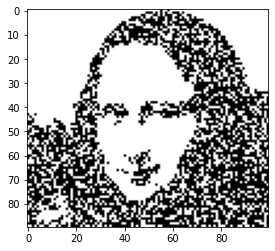





  8%|▊         | 1/12 [01:00<11:02, 60.25s/it]

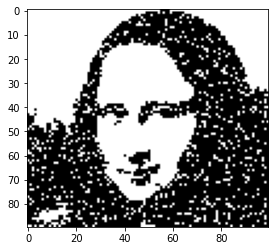





 17%|█▋        | 2/12 [02:05<10:16, 61.70s/it]

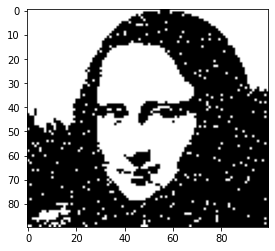





 25%|██▌       | 3/12 [03:11<09:27, 63.07s/it]

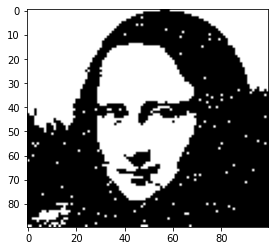





 33%|███▎      | 4/12 [04:17<08:31, 63.96s/it]

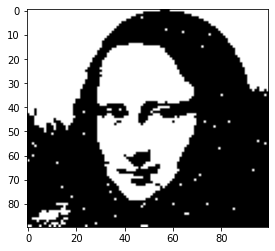





 42%|████▏     | 5/12 [05:25<07:35, 65.03s/it]

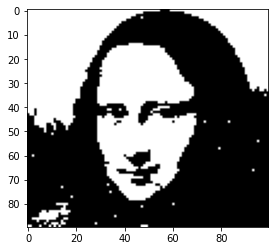





 50%|█████     | 6/12 [06:32<06:34, 65.71s/it]

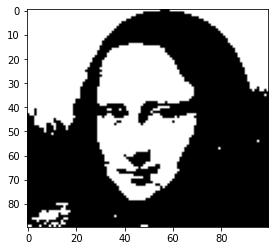





 58%|█████▊    | 7/12 [07:40<05:32, 66.44s/it]

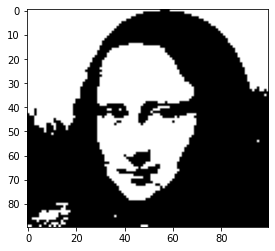





 67%|██████▋   | 8/12 [08:46<04:24, 66.17s/it]

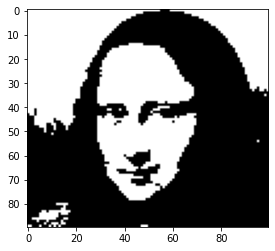





 75%|███████▌  | 9/12 [09:53<03:19, 66.60s/it]

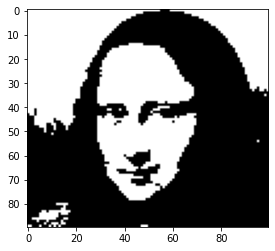





 83%|████████▎ | 10/12 [11:00<02:13, 66.52s/it]

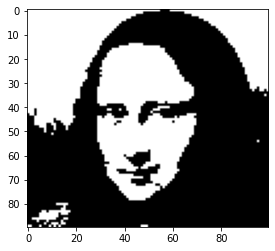





 92%|█████████▏| 11/12 [12:07<01:06, 66.86s/it]

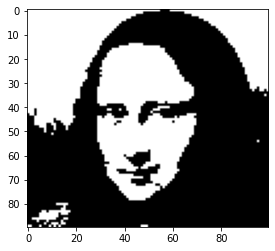





100%|██████████| 12/12 [13:15<00:00, 66.29s/it]


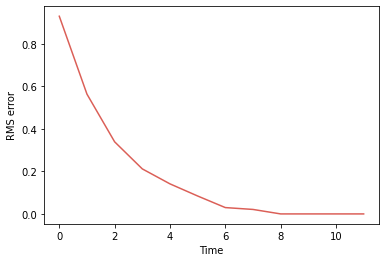

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.metrics import mean_squared_error

def convert_txt_to_array(path, arr):
	'''
	path - path of the text file
	arr - matrix with appropriate shape as that of the text file

	returns a numpy array with the given pixel values in the text file
	'''
	file = open(path, "r")
	z = 0
	for line in file:
		arr[z, :] = np.array(line.split(',')).astype('float')
		z += 1

	return arr

def calc_weight(epsilon, percentage = '0'):
	'''
	epsilon - The vector patterns, which are used to calculate the weight matrix
	percentage - percentage of weights to be assigned to 0

	returns the weight matrix
	'''
	W = np.zeros((epsilon.shape[1], epsilon.shape[1]))
	for i in range(epsilon.shape[0]):
		W_temp = np.outer(epsilon[i], epsilon[i])
		np.fill_diagonal(W_temp, 0)
		W += W_temp

	W = W / W.shape[0]
	X = np.ones((epsilon.shape[1], epsilon.shape[1]))
	if percentage == '25':
		X[:4500, :4500] = 0
	elif percentage == '50':
		X[:, :4500] = 0
	elif percentage == '80':
		X[:, :7200] = 0

	np.fill_diagonal(X, 0)
	W = np.multiply(W, X) #element wise multiplication

	return W

def main(NO_OF_ITERATIONS = 12, percentage = '0'):
	'''
	NO_OF_ITERATIONS - total number of iterations
	percentage - percentage of the weights to be assigned to 0 (percentage can take only 4 values i.e '0', '25', '50', '80')
	'''

	path_ball = "/content/drive/MyDrive/Computational Neuroscience/ball.txt"
	# path_ball = input("Enter the path of the text file of the ball image: ")
	path_cat = "/content/drive/MyDrive/Computational Neuroscience/cat.txt"
	# path_cat = input("Enter the path of the text file of the cat image: ")
	path_mona = "/content/drive/MyDrive/Computational Neuroscience/mona.txt"
	# path_mona = input("Enter the path of the text file of the mona image: ")

	ball_arr = convert_txt_to_array(path_ball, np.zeros((90, 100)))
	cat_arr = convert_txt_to_array(path_cat, np.zeros((90, 100)))
	cat_arr = np.where(cat_arr < 0, -1, 1).astype('float')
	mona_arr = convert_txt_to_array(path_mona, np.zeros((90, 100)))

	N = ball_arr.shape[0]*ball_arr.shape[1] # No. of neurons
	P = 3 #Total number of patterns to be learnt
	NO_OF_ITERATIONS = NO_OF_ITERATIONS
	epsilon = np.asarray([ball_arr, cat_arr, mona_arr])
	random_pattern = np.random.randint(P)
	arr = epsilon[random_pattern] #ground truth output
	mask_image = np.zeros((90, 100))
	mask_image[:45, 20:65] = arr[:45, 20:65]
	test_array = mask_image #input patch
	test_array = test_array.reshape(1, N)
	epsilon = epsilon.reshape(P, N)

	W = calc_weight(epsilon, percentage = percentage)
	h = np.zeros((N))
	rms = np.zeros((NO_OF_ITERATIONS))
	img = []
	img.append(test_array.reshape(90, 100))

	for iteration in tqdm(range(NO_OF_ITERATIONS)):
		for i in range(N):
			i = np.random.randint(N)
			h[i] = 0
			for j in range(N):
				h[i] += W[i, j]*test_array[0, j]
		test_array = (np.where(h<0, -1, 1)).reshape(1, N)
		rms[iteration] = mean_squared_error(test_array, arr.reshape(1, N), squared=False)
		img.append(test_array.reshape(90, 100))
		plt.imshow(np.where(test_array.reshape(90, 100)<0, -1, 1), cmap="gray")
		plt.show()

	#Plot the rms error
	plt.plot(np.arange(NO_OF_ITERATIONS), rms)
	plt.xlabel('Time')
	plt.ylabel('RMS error')
	plt.show()

#percentage - percentage of the weights to be assigned to 0 (percentage can take only 4 values i.e '0', '25', '50', '80')
main(NO_OF_ITERATIONS = 12, percentage = '0')


In [ ]:
import imageio
#Create Gifs
imageio.mimsave('/content/drive/MyDrive/Computational Neuroscience/cat_weight_50%.gif', img, duration = 1)